# Part I - (Ford GoBike System Data)
## by (Rilwan Shittu)

## Introduction
> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math


%matplotlib inline

In [3]:
# load the csv file into the pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_clean = df.copy()

In [4]:
# Get an overhead view of the data
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Check the general information regarding all variables
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# Drop all rows with missing values
df_clean.dropna(inplace=True)

In [7]:
# Convert start time and end time columns to datetime 
df_clean[['start_time','end_time']] = df_clean[['start_time','end_time']].apply(pd.to_datetime)

In [8]:
# convert the stations and bike id's to object types 
df_clean[['start_station_id','end_station_id','bike_id']] = df_clean[['start_station_id','end_station_id','bike_id']].astype(object)

In [9]:
# Create a column for the duration of rides in minutes from their duration in seconds
df_clean['duration_min'] = round(df_clean['duration_sec'].astype(float) / 60,2)

In [10]:
# Changing the datatype of their year of birth from float to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [11]:
# Create a column for the members age from their year of birth
df_clean['member_age'] = 2019 - df_clean['member_birth_year'].astype(int)

In [12]:
# Engineer a feature that reveals the actual distance travelled in km
def get_distance(row, r = 6371): 
    """function to measure the distance between latitudinal and longitudinal degrees"""
    dlon = row[1]['end_station_longitude'] - row[1]['start_station_longitude']
    dlat = row[1]['end_station_latitude'] - row[1]['start_station_latitude']
    a = ((math.sin(dlat/2))**2 + math.cos(row[1]['start_station_latitude']) * math.cos(row[1]['end_station_latitude']) * (math.sin(dlon/2))**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c

df_clean['dist_bet_stations'] = [round(get_distance(row),2) for row in df_clean.iterrows()] 

In [13]:
# Check for effectiveness of changes made above
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
duration_min               174952 non-null float64
member_age          

### What is the structure of your dataset?

> The original dataset included 183,412 rows and 16 columns. However after wrangling the data and engineering some new features, the dataset to be used for analysis now includes 174,952 rows and 19 columns.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in determining the factors that affect the duration of the ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the user type, age, gender and distance travelled will all be interesting to investigate in relation to the period the bike was being used.

## Univariate Exploration


I will start with a quick descriptive summary of the numeric variables in the dataset.

In [14]:
# A descriptive summary of the numeric variables in the dataset
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,member_age,dist_bet_stations
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,11.733373,34.196865,107.532067
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,27.370085,10.118731,69.444751
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.020000,18.000000,0.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.380000,27.000000,57.930000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,32.000000,90.360000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,39.000000,141.430000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.130000,141.000000,4405.790000


Next, I will examine the main variables of interest which are the variables that give direct information on the duration of the rides. They include the durations in seconds and minutes.

In [43]:
# Developing a function for plotting histograms
def histplot(df,xvar,interval,figsize=[7,4],title=' '):
    ''' Plot a histogram
    Inputs: 
    df = dataframe
    xvar = series or variable to be plotted (int/float)
    interval = distance between bins
    '''
    #set bin intervals
    bins = np.arange(df[xvar].min(), df[xvar].max()+interval ,interval)
    #plot
    df[xvar].hist(bins=bins, grid=False, figsize=figsize)
    #for labels, add a space instead of underscore
    xvar=xvar.replace('_',' ')
    # Add title and format it
    plt.title(f'Distribution of {xvar}{title}'.title(), fontsize=14, weight='bold')
    # Add xlabel and format it
    plt.xlabel(xvar.title(), fontsize=10, weight='bold')
    # Add ylabel and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

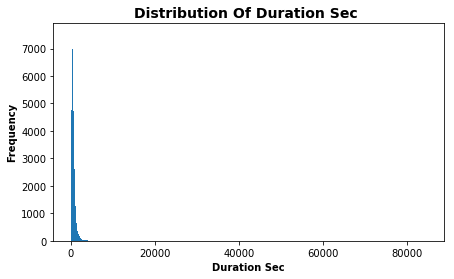

In [44]:
# looking at the duration of rides in seconds
histplot(df_clean, 'duration_sec', 30)

In [16]:
# Taking a look the visually observed outliers to determine if they should be dropped.
# All the seconds figures are accurate as they are the outcome of the difference between the start and end times. 
# Therefore, they will not be dropped and a log transform will be performed on the variable.
outliers = (df_clean['duration_sec'] > 5000) 

print(outliers.sum())
print(df_clean.loc[outliers,:])

884
        duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
91              5621 2019-02-28 21:41:16.900 2019-02-28 23:14:58.186   
199            15123 2019-02-28 18:23:19.035 2019-02-28 22:35:22.294   
297            13061 2019-02-28 18:28:18.728 2019-02-28 22:05:59.954   
511             7421 2019-02-28 19:16:02.778 2019-02-28 21:19:44.144   
524             6447 2019-02-28 19:30:09.314 2019-02-28 21:17:36.905   
779            36190 2019-02-28 10:30:03.377 2019-02-28 20:33:14.228   
790             5927 2019-02-28 18:52:30.715 2019-02-28 20:31:17.765   
813             9994 2019-02-28 17:41:05.362 2019-02-28 20:27:39.511   
926             5085 2019-02-28 18:48:01.975 2019-02-28 20:12:47.641   
939            16804 2019-02-28 15:30:33.480 2019-02-28 20:1

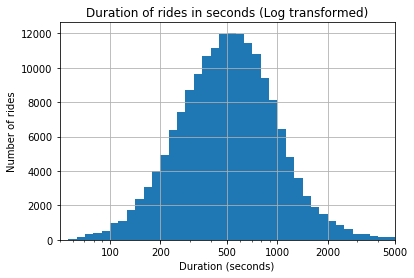

In [17]:
# Log transformation of the duration in seconds variable
log_binsize = 0.05
bins= 10 ** np.arange(1.7, np.log(df_clean['duration_sec'].max())+log_binsize, log_binsize)
df_clean.duration_sec.hist(bins=bins)
plt.xscale('log')
x_ticks = [100,200,500,1000,2000,5000]
plt.xticks(x_ticks, x_ticks)
plt.xlim(50,5000) 
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of rides')
plt.title('Duration of rides in seconds (Log transformed)');

The initial plot of the duration variable was right skewed with large gaps between bins and some value(s) over 80,000 secs and thus revealed the presence of outlier(s). This meant it had to be log transformed. From the log transformed distribution, a unimodal distribution is observed and it can be seen that most rides were between 240 to 1200 seconds.

Next up, the duration in minutes will be examined.

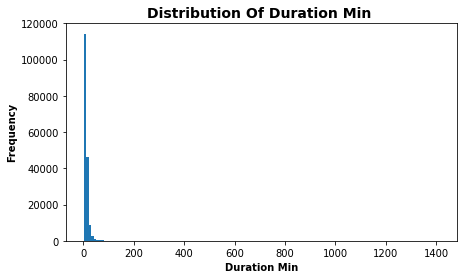

In [45]:
# Examining the distribution of the duration in minutes
histplot(df_clean, 'duration_min', 10)

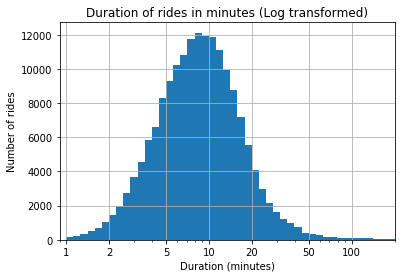

In [19]:
# Log transformation of the duration in minutes variable
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log(df_clean['duration_min'].max())+log_binsize, log_binsize)
df_clean.duration_min.hist(bins=bins)
plt.xscale('log')
x_ticks = [1,2,5,10,20,50,100]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of rides')
plt.title('Duration of rides in minutes (Log transformed)')
plt.xlim(0.9,200);

Similar to what was observed in the plots of the duration in seconds. The graph had to be transformed into a logarithmic scale since the standard plot was hightly right skewed and outlier(s) were present. A unimodal distribution is observed with its peaks between 4 to 20 minutes. This outcome was expected because the minutes variable was created from the duration in seconds variable. 

Next up, their gender will be explored.

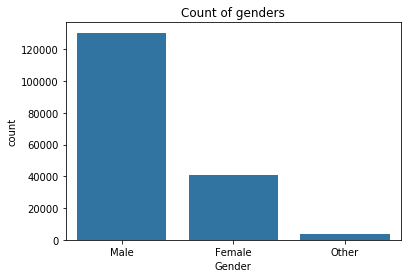

In [20]:
# Exploring the gender variable
color = sb.color_palette()[0]
gender_order = ['Male', 'Female', 'Other']
sb.countplot(data=df_clean, x='member_gender', order=gender_order, color=color)
plt.xlabel('Gender')
plt.title('Count of genders');

The number of men are at least 3 times more than the number of women that use the bikes with a count of over 120,000 and 40,000 respectively.

Further, I will be digging into the user types of users.

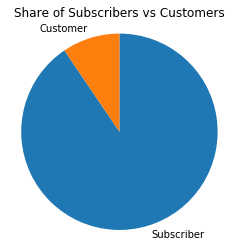

In [21]:
# viewing the proportion of the type of users 
users = df_clean.user_type.value_counts()
plt.pie(x=users, labels=users.index, startangle=90, counterclock = False)
plt.axis('square')
plt.title('Share of Subscribers vs Customers');

The pie chart reveals that about a whopping 90% of the users are subscribers while only about 10% are single use customers. I believe this is because subscribers will get a cheaper rate. Hence, it is more economical to be a subscriber if you intend to use the service frequently.

The distribution of ages will be plotted next.

(15, 60)

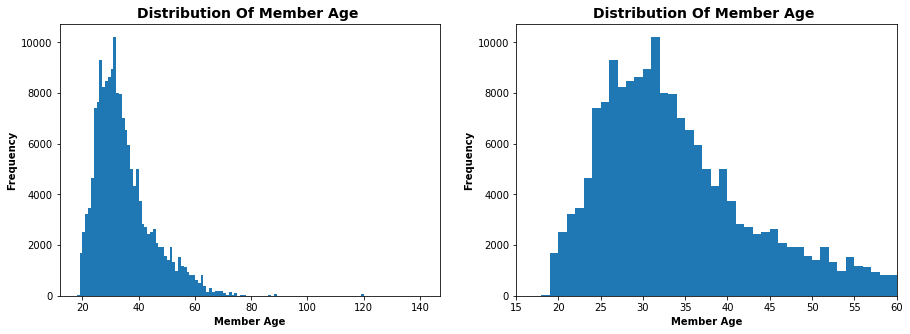

In [50]:
# Plotting the distribution of ages
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
histplot(df_clean, 'member_age', 1, figsize=[15,5])

plt.subplot(1,2,2) # Zooming in to the plot for more clarity
histplot(df_clean, 'member_age', 1, figsize=[15,5])
plt.xlim(15,60)

The first subplot (left) above looks right skewed. This was expected because the minimum age to access the bike sharing service was 18 but there was no maximum age. There were also outliers with the highest at over 140. This meant we had to zoom into the plot to understand and interpret it better. Thus, it can be seen from the right plot that most users were aged between 23 and 40.

An examination of the distribution of the distance travelled between stations follows.

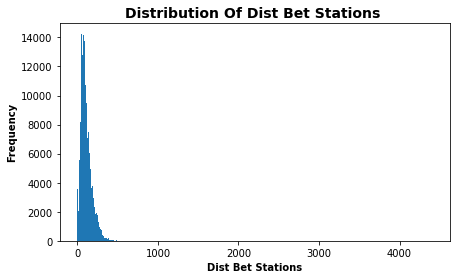

In [53]:
# Examining the distance travelled between stations
histplot(df_clean, 'dist_bet_stations', 10)

(10, 500)

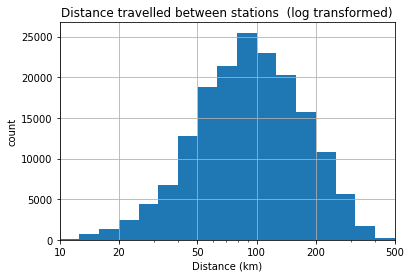

In [24]:
# Log transformation of the distance travelled
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log(df_clean['dist_bet_stations'].max())+log_binsize, log_binsize)
df_clean.dist_bet_stations.hist(bins=bins)
plt.xscale('log')
x_ticks = [10,20,50,100,200,500,1000,2000]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('Distance (km)')
plt.ylabel('count')
plt.title('Distance travelled between stations  (log transformed)')
plt.xlim(10,500)

The log transformation shows a unimodal distribution with the average distance travelled from one station to the other is between 40km and 200km.

In [25]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age,dist_bet_stations
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.75,35,32.26
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.90,47,176.67
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.17,30,17.30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.42,45,163.95
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.88,60,199.25


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The primary variable of interest is the duration of rides (minutes). This was engineered from the duration of rides (seconds) which was provided in the original dataset. As expected, both variables had a similar distributions. They were both right skewed and had outliers. Hence, they had to be plotted on logarithmic scales. From the log transformed distributions, unimodal distributions were observed and it was clear that most rides were between 240 to 1200 seconds and between 5 to 16 minutes. However, only the minutes variable will be used in our analysis moving forward because it is a better descriptor of time. For instance, it is better to say "10 minutes" than "600 seconds".


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A number of variables were right skewed  with strong outliers. However, an examination of the outliers revealed that they were legitimate observations. Thus, they remained as part of the dataset.

## Bivariate Exploration

> This section seeks to investigate relationships between pairs of variables that were introduced in the previous section (univariate exploration).

I will start by viewing the correlation of the numeric variables in a heatmap.

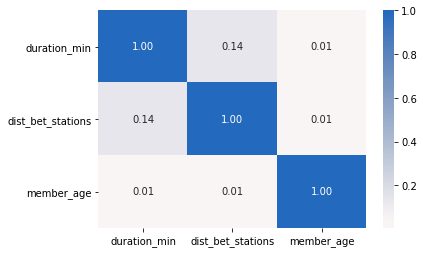

In [26]:
# correlation plot of numeric variables
numeric_vars = ['duration_min', 'dist_bet_stations', 'member_age']
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

There seems to be little to no correlation between the pairs of numeric variables plotted in the heatmap.

Let's take a look at the scatterplots between the pairs.

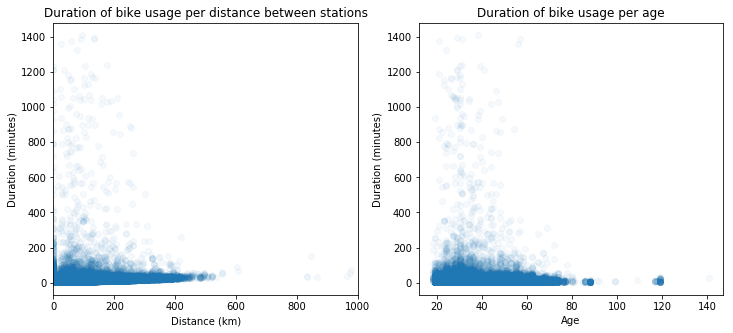

In [27]:
# Scatter plots of age and distance between stations in relation to the main feature of interest
plt.figure(figsize=[12,5])

plt.subplot(1,2,1) # Left plot
plt.scatter(data=df_clean, x='dist_bet_stations', y='duration_min', alpha=0.04)
plt.xlabel('Distance (km)')
plt.ylabel('Duration (minutes)')
plt.title('Duration of bike usage per distance between stations')
plt.xlim(0,1000);

plt.subplot(1,2,2) # Right plot
plt.scatter(data=df_clean, x='member_age', y='duration_min', alpha=0.04)
plt.xlabel('Age')
plt.ylabel('Duration (minutes)')
plt.title('Duration of bike usage per age');

The absence of a relationship between the pairs is confirmed here. Nonetheless, it is noteworthy from the left plot that most people used the bikes for less than 100 minutes and travelled between 0 to 400km. Many rented a bike and returned it to the same station, this is the reason for the concentration of zero distances at the bottom left of the plot. The right plot also reveals that most users were aged below 80 and also used the bikes for about 100 minutes or less.

An investigation into the relationship between the categorical variables and the primary variable of interest follows.

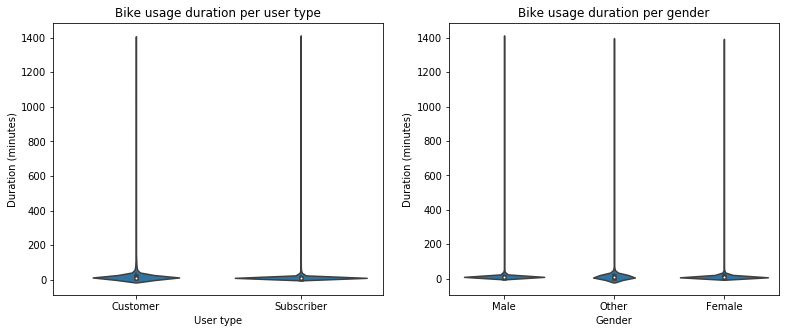

In [54]:
# Violin plots of the user types and gender in relation to the duration in minutes
plt.figure(figsize=[13,5])
color = sb.color_palette()[0]

plt.subplot(1,2,1) # Left plot
sb.violinplot(data=df_clean, x='user_type', y='duration_min', color=color)
plt.xlabel('User type')
plt.ylabel('Duration (minutes)')
plt.title('Bike usage duration per user type');

plt.subplot(1,2,2) # Right plot
sb.violinplot(data=df_clean, x='member_gender', y='duration_min', color=color)
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.title('Bike usage duration per gender');

An upside-down "T" is observed for all variables in both plots. This indicates a deep concentration at the base below 100 minutes regardless of their subscription status or gender.

Finally, let's look at the relationship be the two qualitative variables: user type and gender.

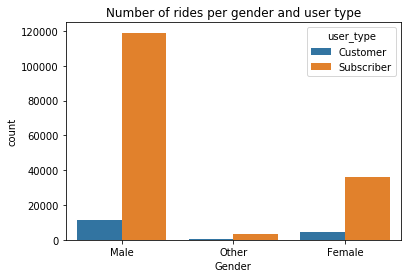

In [29]:
# Clustered bar chart of the user types and gender.
sb.countplot(data=df_clean, x='member_gender', hue='user_type')
plt.xlabel('Gender')
plt.title('Number of rides per gender and user type');

The plot above shows that more subscribers are males. This is not a surprise because men are generally more physically active.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> No real relationship was observerd between the key feature of interest and other features in the dataset. However, one thing stood out amongst the plots relating to the main feature of interest regardless of age, gender, subscription status or distance and that is the average rider uses the bike for less than 100 minutes before returning it to a station.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the users were subscribers and most of the subscribers are males. However, this was not much of a surprise because males are generally sportier than females.

## Multivariate Exploration

> This section seeks to investigate relationships between three variables or more that have been introduced in the previous sections.

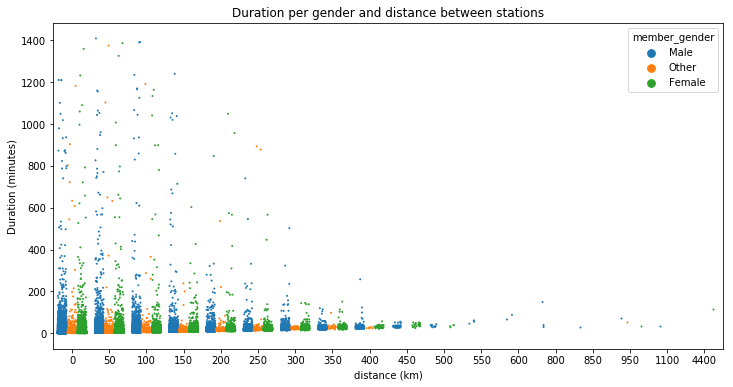

In [32]:
# Checking the relationship between gender, distance and usage time per ri
plt.figure(figsize=[12,6])

df_clean['dist_bet_stations_cat'] = ((df_clean['dist_bet_stations']//50)*50).astype(int)

sb.stripplot(data=df_clean, x='dist_bet_stations_cat', y='duration_min', hue='member_gender', size=2, jitter=0.35, dodge=True)
plt.xlabel('distance (km)')
plt.ylabel('Duration (minutes)')
plt.title('Duration per gender and distance between stations');

We see a strong concentration at the base of the plot just below 100 minutes and before 400km. It also looks like males have a much higher chance of using the bikes for more than 100 munites.

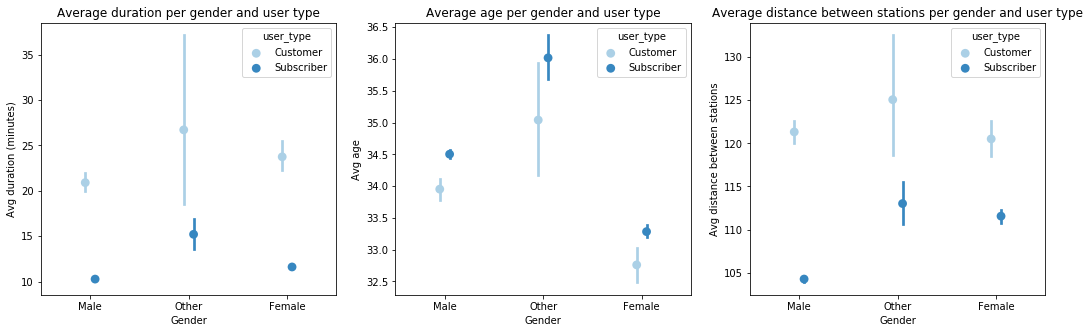

In [31]:
# point plots of the user types and gender in relation to the duration, age and distance
plt.figure(figsize=[18,5])

plt.subplot(1,3,1) # Left plot
sb.pointplot(data=df_clean, x='member_gender', y='duration_min', hue='user_type', palette='Blues', linestyles='', dodge=0.1)
plt.xlabel('Gender')
plt.ylabel('Avg duration (minutes)')
plt.title('Average duration per gender and user type');

plt.subplot(1,3,2) # Centre plot
sb.pointplot(data=df_clean, x='member_gender', y='member_age', hue='user_type', palette='Blues', linestyles='', dodge=0.1)
plt.xlabel('Gender')
plt.ylabel('Avg age')
plt.title('Average age per gender and user type');

plt.subplot(1,3,3) # Right plot
sb.pointplot(data=df_clean, x='member_gender', y='dist_bet_stations', hue='user_type', palette='Blues', linestyles='', dodge=0.1)
plt.xlabel('Gender')
plt.ylabel('Avg distance between stations')
plt.title('Average distance between stations per gender and user type');

From the left plot, we see that subscribers generally use the bike sharing service for an average of about 15 minutes which is 10 minutes less than the average usage of non-subscribers at 25 minutes. We also see from the centre plot that subscribers are generally older than non-subscribers. Finally, the last plot reveals that subscribers generally also rode the bikes over shorter distances between stations than non-subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Although the average time per ride was less than 100 minutes, males were more likely to use the bikes for longer than females.

### Were there any interesting or surprising interactions between features?

> It's interesting to not that subscribers were generally older, travelled for fewer distances between stations and also used the service for about 10 minutes less per ride than non-subscribers. 

## Conclusions
>The number of men that used the bike sharing service are at least 3 times more than the number of women with about 130,000 and 40,000 respectively. The average user of the service was between 23 and 40 years old. Although most rides were were less than 100 minutes, its peak was between 4 to 20 minutes and the average distance travelled from one station to another was between 40km and 200km. About 90% of the bike sharing service users are subscribers while only about 10% are single use customers. Subscribers are largely males and are generally older than non-subscribers, they also rode the bikes over shorter distances between stations than non-subscribers and generally used the bikes for an average of about 15 minutes which is 10 minutes less than the average time of non-subscribers at 25 minutes. 

